# Задачи классификации и кластеризации. ДЗ в рамках курса Нетологии "Data Scientist: с нуля до middle"

In [1]:




'''Задание.

    Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
    Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
    Разделите данные на выборку для обучения и тестирования
    Постройте модель LDA
    Визуализируйте предсказания для тестовой выборки и центры классов (разделяющую плоскость можно не строить, 
    но обратите внимание, что класса 3)
    Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
    Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию
'''



from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()

# Методы, доступные для набора данных
print(dir(iris))


['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [2]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [7]:
#названия колонок
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [9]:
#собираем Датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)

variety = iris.target
data.drop(['petal length (cm)','petal width (cm)'], axis = 1, inplace = True) 
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


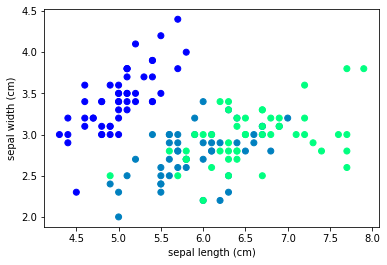

In [10]:
#Визулизация

x_axis = data['sepal length (cm)'] 
y_axis = data['sepal width (cm)']  
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(x_axis, y_axis, cmap='winter', c=variety)
plt.show()

In [106]:
# приведем данные к единому масштабу
scaler = StandardScaler()
scale= scaler.fit_transform(data)



In [107]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scale, variety, test_size=0.35, random_state = 10, stratify = variety)

In [108]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [109]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [110]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 0, 0, 0,
       2, 1, 2, 2, 0, 0, 1, 1, 0, 2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 2, 2, 0,
       1, 2, 1, 0, 0, 0, 2, 0, 2])

In [111]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,2,1
1,1,1
2,2,1
3,1,1
4,2,2
5,1,2
6,1,1
7,1,1
8,1,1
9,2,2


In [112]:
#вывод точности
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.8490566037735849

In [113]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-4.16632743,  3.18758691],
       [ 1.30814593, -1.53807587],
       [ 2.98837923, -1.74912313]])

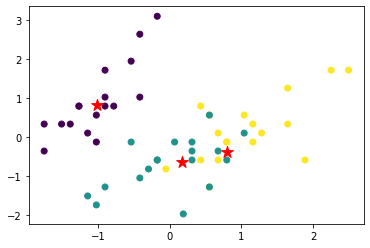

In [116]:
# Визуализируем тестовые данные
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
#plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')


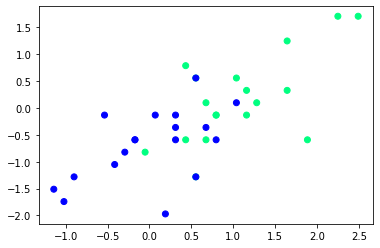

In [119]:
#Визуализируем классы 1 и 2. Видим, что модель путает точки в этих классах
small_train = X_train[(y_train == 1) | (y_train == 2)]
#small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 1) | (y_train == 2)]
small_test = X_test[(y_test == 1) | (y_test == 2)]
#small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 1) | (y_test == 2)]
plt.scatter(small_test[:, 0], small_test[:, 1],cmap='winter', c=sy_test)
# plt.scatter(small_test['sepal length (cm)'], small_test['sepal width (cm)'],cmap='winter', c=sy_test)
# plt.xlabel('sepal length (cm)')
# plt.ylabel('sepal width (cm)')
# plt.show()


In [120]:
#проведем LDA для данных классов 
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [121]:
accuracy_score(sy_test, lda.predict(small_test))

0.7777777777777778

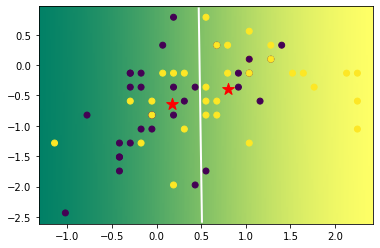

In [122]:
# по аналогии с лекцией построим графики с разделяющей плоскостью
#plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.scatter(small_train[:, 0], small_train[:, 1], c=sy_train)
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы 
plt.pcolormesh(xx, yy, Z, cmap='summer',zorder=-1, shading='auto')

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [123]:
lda_small.coef_ #признак "sepal length" гораздо влиятельнее, чем "sepal width"

array([[1.20791999, 0.01247843]])

In [125]:
#Построим логистическую регрессию
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(small_train, sy_train)

LogisticRegression()

In [128]:
lr.predict(small_test)

array([2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2])

In [127]:
#чуть точнее lda
accuracy_score(sy_test, lr.predict(small_test))

0.8055555555555556

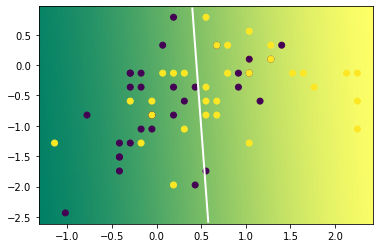

In [129]:
# по аналогии с лекцией построим графики с разделяющей плоскостью
#plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.scatter(small_train[:, 0], small_train[:, 1], c=sy_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='summer', zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

In [131]:
#попробуем найти оптимальное количество кластеров методом локтя
from sklearn.cluster import KMeans

nmp = data.to_numpy()

# строим график локтя

# создаем список для инерции
k_inertia = []

for k in range(1, 16):
    clf_kmeans = KMeans(n_clusters=k, init ='k-means++', n_init = 10, max_iter = 100, random_state = 0)
    clusters_kmeans = clf_kmeans.fit(nmp)
    # добавляем инерk_inertiaцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


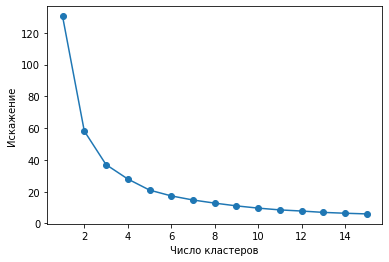

In [132]:
plt.plot(range(1, 16),k_inertia, marker = 'o' )
plt.xlabel('Число кластеров')
plt.ylabel('Искажение')
plt.show()

В данном графике сложно однозначно сказать, какое количество кластеров оптимально для рассматриваемой задачи: 
3, 4 или 5.
Попробуем определить оптимальное количество кластеров через "силуэтный" метод.

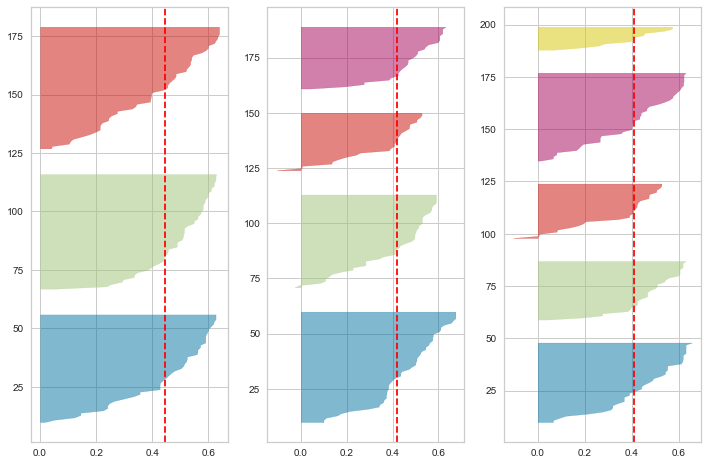

In [133]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(1, 3, figsize=(12,8))
for i in range(3,6):
    #для различного количества кластеров применяем метод k-means
    clf_kmeans = KMeans(n_clusters=i)

    #строим "силуэтный" график для каждого количества кластеров
    visualizer = SilhouetteVisualizer(clf_kmeans, colors='yellowbrick', ax = ax[i-3])
    visualizer.fit(nmp)  

Таким образом, оптимальное количество кластеров для рассматриваемой задачи, исходя из однородности "силуэтов" равно 3

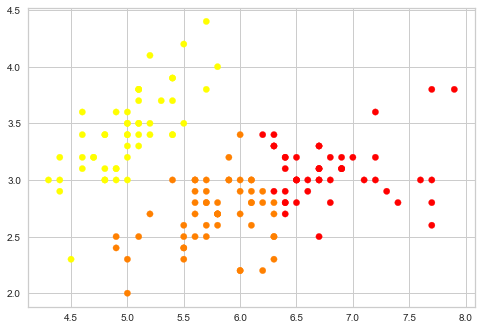

In [134]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(nmp)

plt.scatter(nmp[:, 0], nmp[:, 1], cmap='autumn', c=clusters, s=40)